In [207]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [209]:
titanic_train = pd.read_csv('/home/niraj/Downloads/train.csv')
titanic_test = pd.read_csv('/home/niraj/Downloads/test.csv')

In [210]:
titanic_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [211]:
titanic_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [212]:
titanic_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [213]:
titanic_train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [214]:
titanic_train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


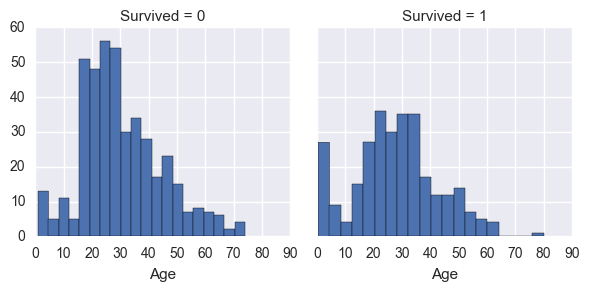

In [215]:
%matplotlib inline
g = sns.FacetGrid(titanic_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

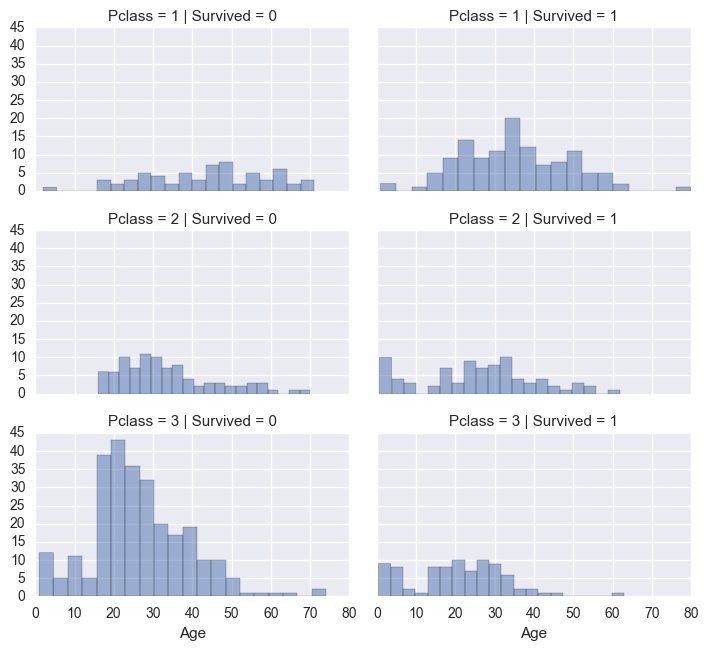

In [216]:
grid = sns.FacetGrid(titanic_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

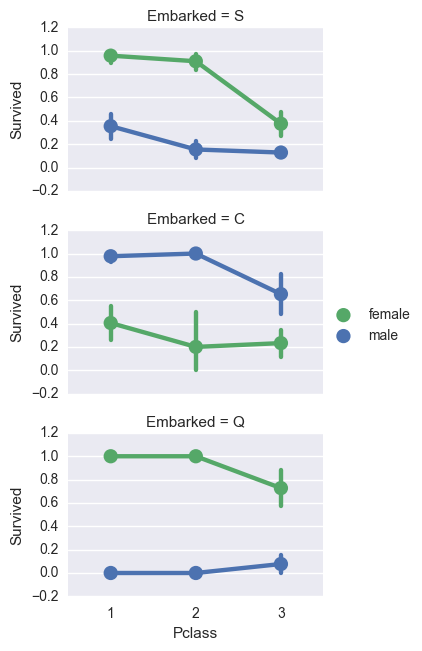

In [217]:
grid = sns.FacetGrid(titanic_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

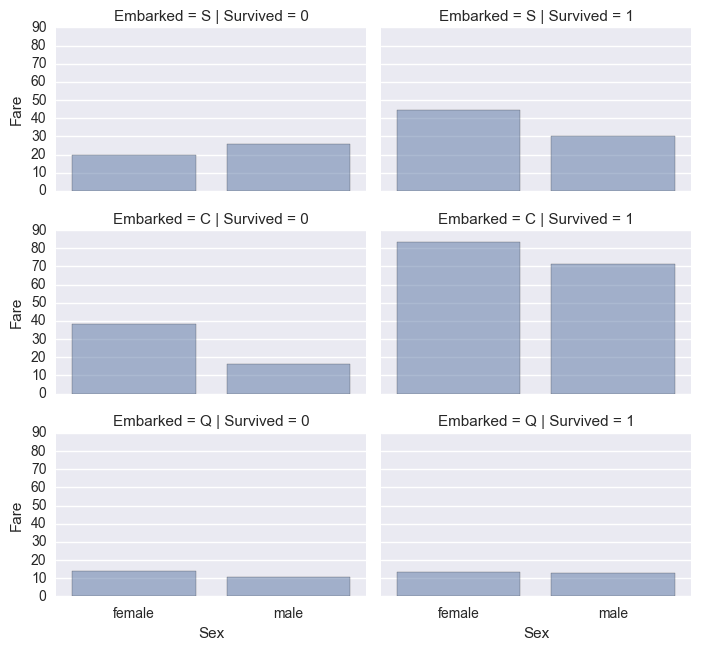

In [218]:
grid = sns.FacetGrid(titanic_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [219]:
full = [titanic_train,titanic_test]

In [220]:
print("Before:")
titanic_train.shape , titanic_test.shape ,full[0].shape,full[1].shape

Before:


((891, 12), (418, 11), (891, 12), (418, 11))

In [221]:
titanic_train = titanic_train.drop(['Ticket','Cabin'],axis=1)
titanic_test = titanic_test.drop(['Ticket','Cabin'],axis=1)

In [222]:
full = [titanic_train,titanic_test]
print("After:")
titanic_train.shape , titanic_test.shape ,full[0].shape,full[1].shape

After:


((891, 10), (418, 9), (891, 10), (418, 9))

In [223]:
for dataset in full:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

pd.crosstab(titanic_train['Title'],titanic_train['Sex'])    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [224]:
for dataset in full:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [225]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in full:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,0.347826


In [226]:
titanic_train = titanic_train.drop(['Name','PassengerId'],axis=1)

In [227]:
titanic_test=titanic_test.drop(['Name'],axis=1)

In [228]:
full = [titanic_train,titanic_test]

In [229]:
titanic_train.shape,titanic_test.shape

((891, 9), (418, 9))

In [230]:
for dataset in full:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)

In [231]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


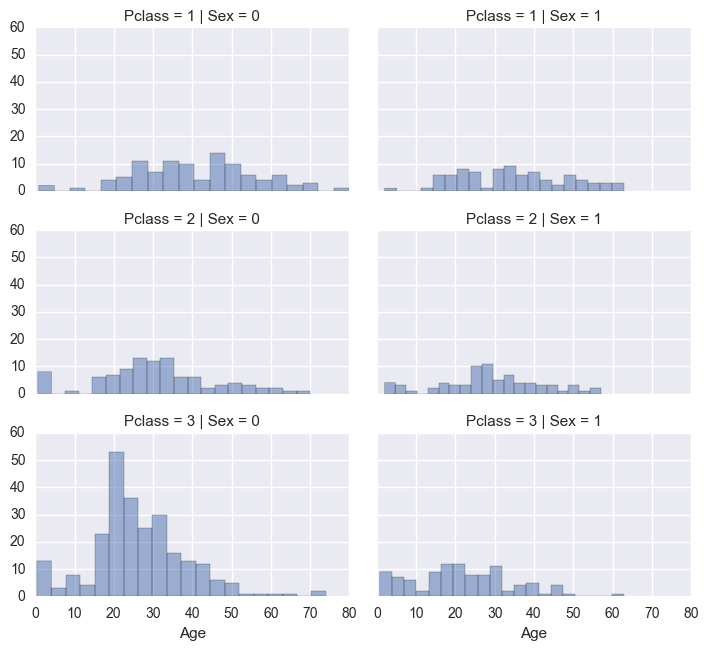

In [232]:
grid = sns.FacetGrid(titanic_train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [233]:
titanic_train['Age']=titanic_train['Age'].fillna(titanic_train['Age'].median())

In [234]:
titanic_test['Age']=titanic_test['Age'].fillna(titanic_test['Age'].median())    

In [235]:
for dataset in full:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,1
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,2
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,1


In [236]:
titanic_train['Age']=titanic_train['Age'].astype(int)

In [237]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [238]:
titanic_test['Age']=titanic_test['Age'].astype(int)

In [239]:
for dataset in full:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

titanic_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [240]:
for dataset in full:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

titanic_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [241]:
titanic_train = titanic_train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
titanic_test = titanic_test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [titanic_train, titanic_test]

titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [242]:
freq =titanic_train.Embarked.dropna().mode()[0]

In [243]:
freq

'S'

In [244]:
for dataset in full:
    
    dataset['Embarked'] = dataset['Embarked'].fillna(freq)
    
titanic_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [245]:
titanic_train.sample(4)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
244,0,3,0,1,7.2250,C,1,1
753,0,3,0,1,7.8958,S,1,1
457,1,1,1,1,51.8625,S,3,0
24,0,3,1,0,21.0750,S,2,0


In [246]:
freq

'S'

In [247]:
titanic_train['Embarked']=titanic_train['Embarked'].fillna(freq)

In [248]:

titanic_train['Embarked'] = titanic_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [249]:
titanic_test['Embarked']=titanic_test['Embarked'].fillna(freq)
titanic_test['Embarked'] = titanic_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [250]:
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


In [251]:
freq = titanic_test['Fare'].median()
freq

14.4542

In [252]:

titanic_test['Fare']=titanic_test['Fare'].fillna(freq)
titanic_test.head()


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,1,1
1,893,3,1,2,7.0000,0,3,0
2,894,2,0,3,9.6875,2,1,1
3,895,3,0,1,8.6625,0,1,1
4,896,3,1,1,12.2875,0,3,0


In [253]:
full=[titanic_train,titanic_test]
for dataset in full:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)



In [254]:
for dataset in full:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

titanic_train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [255]:
X_train = titanic_train.drop(['Survived'],axis=1)
Y_train= titanic_train['Survived']
X_test = titanic_test.drop(['PassengerId'],axis=1)
X_train.shape,Y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

In [256]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.359999999999999

In [257]:
coeff_df = pd.DataFrame(titanic_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
1,Sex,2.202889
5,Title,0.397770
2,Age,0.287262
4,Embarked,0.261676
6,IsAlone,0.125738
3,Fare,-0.086255
7,Age*Class,-0.310302
0,Pclass,-0.748133


In [288]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.840000000000003

In [290]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.510000000000005

In [261]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

71.829999999999998

In [262]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

77.670000000000002

In [263]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.010000000000005

In [264]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

72.280000000000001

In [274]:
# Decision Tree

decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

81.260000000000005

In [272]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100,max_depth=3)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

81.140000000000001

In [318]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,84.51
0,Support Vector Machines,83.84
8,Decision Tree,81.26
2,Logistic Regression,80.36
3,Random Forest,80.13
7,Linear SVC,79.01
5,Perceptron,77.67
6,Stochastic Gradient Decent,72.28
4,Naive Bayes,71.83


In [291]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('/home/niraj/submissiontrial.csv', index=False)

In [277]:
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [278]:
predictors = ["Pclass", "Sex", "Age","Fare", "Embarked","Title","IsAlone","Age*Class"]

In [279]:
alg=LogisticRegression(random_state=1)

In [283]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(alg, titanic_train[predictors], titanic_train["Survived"], cv=3)

In [284]:
scores.mean()

0.80695847362514028

In [285]:
alg.fit(titanic_train[predictors],titanic_train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [286]:
predictions = alg.predict(X_test)

In [287]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('/home/niraj/subm1.csv', index=False)

In [292]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

In [293]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(titanic_train[predictors],titanic_train["Survived"])

In [296]:
features = pd.DataFrame()
features['feature'] = titanic_train[predictors].columns
features['importance'] = clf.feature_importances_

In [297]:
features.sort(['importance'],ascending=False)

/home/niraj/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,feature,importance
1,Sex,0.318739
5,Title,0.187806
0,Pclass,0.169953
3,Fare,0.114126
7,Age*Class,0.064108
4,Embarked,0.058917
2,Age,0.051803
6,IsAlone,0.034548


In [307]:
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'criterion' : ['gini','entropy'],   
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': [200,210,220,230,240]
                 
                 }

cross_validation = StratifiedKFold(titanic_train['Survived'], n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(titanic_train[predictors], titanic_train['Survived'])

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8181818181818182
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 220}


In [308]:
pipeline = grid_search

In [313]:
output = pipeline.predict(X_test).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = titanic_test['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('/home/niraj/outputsubm.csv',index=False)

In [314]:
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [319]:
alg=RandomForestClassifier(random_state=1,criterion='entropy',n_estimators=220,max_depth=5)
from sklearn import cross_validation
scores = cross_validation.cross_val_score(alg, titanic_train[predictors], titanic_train["Survived"], cv=5)
scores.mean()

0.81484335518959417

In [320]:
alg.fit(titanic_train[predictors],titanic_train["Survived"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=220, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [321]:
predictions = alg.predict(X_test)

In [322]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('/home/niraj/kgsubm1.csv', index=False)